# Regridding 

`esmlab` supports a regridding workflow that is based on named grid files saved in SCRIP format. 

In [1]:
%matplotlib inline
import xarray as xr
import numpy as np

import esmlab

Load some dummy data.

In [12]:
dsx1 = xr.open_dataset('/glade/work/mclong/grids/POP_gx1v7.nc')
dsx1 = dsx1.drop([v for v in dsx1.variables if v not in ['z_t','HT','KMT']])

dsx3 = xr.open_dataset('/glade/work/mclong/grids/pop-grid-g37.nc')
dsx3 = dsx3.drop([v for v in dsx3.variables if v not in ['z_t','HT','KMT']])

dsx1.HT.values = np.where(dsx1.KMT > 0,dsx1.HT.values,np.nan)
dsx3.HT.values = np.where(dsx3.KMT > 0,dsx3.HT.values,np.nan)

In [7]:
esmlab.set_options(gridfile_directory='/glade/work/mclong/esmlab-regrid')
esmlab.get_options()

{'gridfile_directory': '/glade/work/mclong/esmlab-regrid',
 'grid_defitions_file': '/gpfs/u/home/mclong/codes/esmlab/esmlab/grid_definitions.yml'}

## Instantiate the `regridding` object

The regridder is initialized with a specific source grid and destination grid. The grid files describeing this must be present (**future work will enable on-the-fly generation**).

In [10]:
method = 'bilinear'
src_grid_name = 'POP_gx1v7'
dst_grid_name = 'POP_gx3v7'

R = esmlab.regridder(src_grid_name, dst_grid_name, 
                     method = method,                      
                     overwrite_existing=False)
R

## Perform the regridding

In [16]:
da_x1_on_x3 = R(dsx1.HT, renormalize=True)
da_x1_on_x3

<xarray.DataArray 'HT' (nlat: 116, nlon: 100)>
array([[         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [82960.6956  ,          nan,          nan, ...,          nan,
        36713.721329, 74816.301981],
       [80975.451175, 69774.160175, 37670.737975, ..., 30221.084719,
        33983.806102, 52968.637226],
       ...,
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan],
       [         nan,          nan,          nan, ...,          nan,
                 nan,          nan]])
Dimensions without coordinates: nlat, nlon
Attributes:
    long_name:      ocean depth at T points
    units:          centimeter
    regrid_method:  bilinear

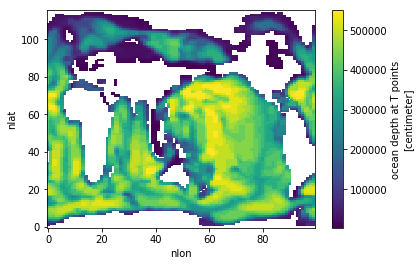

In [13]:
dsx3.HT.plot()

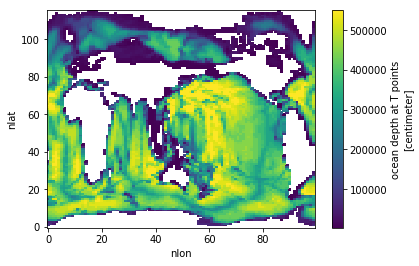

In [17]:
da_x1_on_x3.plot()